In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
pd.set_option("display.max_columns", 120)
sns.set_theme(context="notebook", style="whitegrid")

df = pd.read_csv("../data/processed/merged.csv")
print(df.shape)
df.head(2)



(9183, 14)


,id,latitude,longitude,neighbourhood_cleansed,room_type,property_type,accommodates,bedrooms,bathrooms_num,minimum_nights,price_eur,review_scores_rating,number_of_reviews,unavailable_rate_90d
0,3176,52.53471,13.41810,Prenzlauer Berg Südwest,Entire home/apt,Entire rental unit,2,1.0,1.0,63,105.0,4.63,149,0.000000
1,9991,52.53269,13.41805,Prenzlauer Berg Südwest,Entire home/apt,Entire rental unit,7,4.0,2.5,6,135.0,5.00,7,0.186813


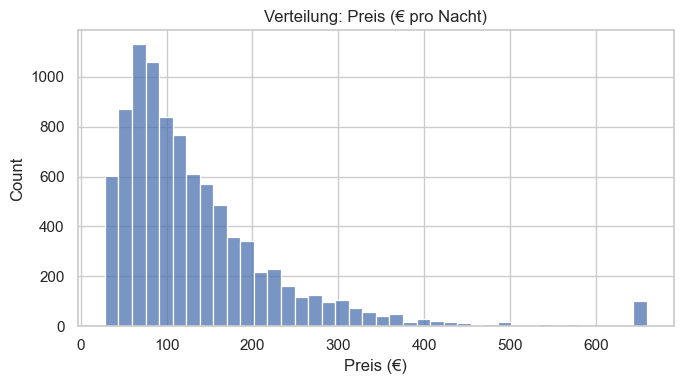

In [2]:
plt.figure(figsize=(7,4))
sns.histplot(df["price_eur"], bins=40)
plt.title("Verteilung: Preis (€ pro Nacht)")
plt.xlabel("Preis (€)")
plt.tight_layout()
plt.savefig("../reports/figures/price_hist.png", dpi=160)
plt.show()


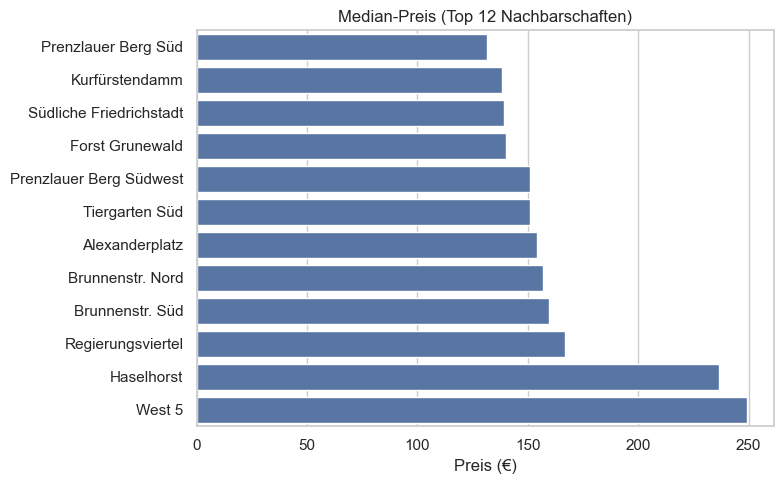

In [3]:
if "neighbourhood_cleansed" in df:
    med = (df.groupby("neighbourhood_cleansed")["price_eur"]
             .median().sort_values(ascending=False).head(12)).iloc[::-1]
    plt.figure(figsize=(8,5))
    sns.barplot(x=med.values, y=med.index)
    plt.title("Median-Preis (Top 12 Nachbarschaften)")
    plt.xlabel("Preis (€)"); plt.ylabel("")
    plt.tight_layout()
    plt.savefig("../reports/figures/price_by_neighbourhood_top12.png", dpi=160)
    plt.show()


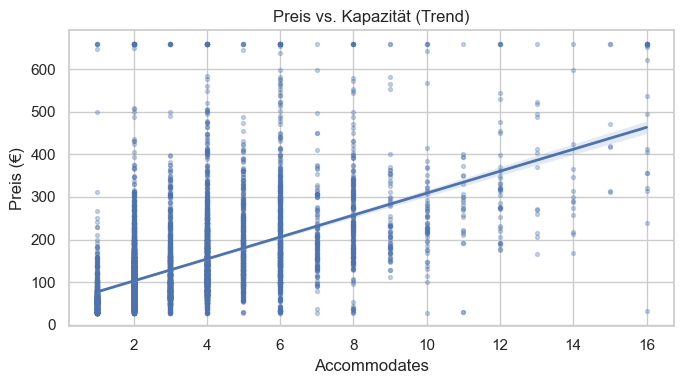

In [4]:
if "accommodates" in df:
    plt.figure(figsize=(7,4))
    sns.regplot(data=df, x="accommodates", y="price_eur",
                scatter_kws={"s":8, "alpha":0.3}, line_kws={"lw":2})
    plt.title("Preis vs. Kapazität (Trend)")
    plt.xlabel("Accommodates"); plt.ylabel("Preis (€)")
    plt.tight_layout()
    plt.savefig("../reports/figures/price_vs_accommodates.png", dpi=160)
    plt.show()


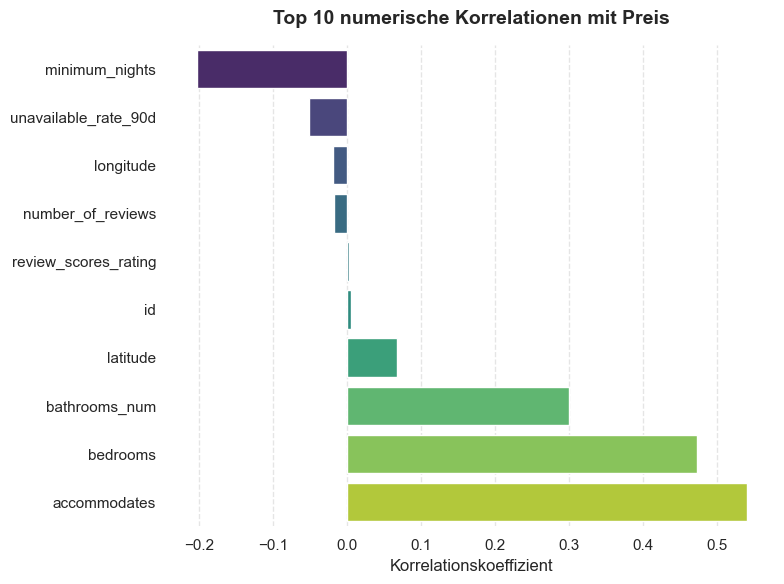

In [7]:
# Korrelationen mit Preis berechnen
numcorr = df.select_dtypes(include=[np.number]).corr(numeric_only=True)["price_eur"].sort_values(ascending=False)

# Top 10 (ohne price_eur selbst)
top = numcorr.drop("price_eur").head(10).sort_values()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=top.values, y=top.index, palette="viridis" ,hue=top.index, legend=False)

plt.title("Top 10 numerische Korrelationen mit Preis", fontsize=14, weight="bold", pad=15)
plt.xlabel("Korrelationskoeffizient", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.5)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.savefig("../reports/figures/price_corr_top.png", dpi=160)
plt.show()



# Executive Summary
- Preise konzentrieren sich im Bereich …–… € (bereinigt).
- Entire Home/Apt hat deutlich höhere Medianpreise als Private Room.
- Top-12 Nachbarschaften zeigen klare Preisunterschiede.
- Preis steigt mit Kapazität; Review Score korreliert positiv (leicht).
- Demand-Proxy = Näherung: "unavailable" enthält auch Host-Blockierungen.
